### The first part is taken from Yunhe's HW4 assignment 2, revised according to the reviews from Haoming & Dr. Bianco. 
## This is the start of first part

In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json

%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [2]:
#download 201503data from citibike
!curl https://s3.amazonaws.com/tripdata/201503-citibike-tripdata.zip > 201503-citibike-tripdata.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8221k  100 8221k    0     0  20.1M      0 --:--:-- --:--:-- --:--:-- 20.1M


In [3]:
#move the download data to PUI data (folder)
print ("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /nfshome/yc3420/PUIdata


In [4]:
!mv 201503-citibike-tripdata.zip $PUIDATA

In [5]:
!ls $PUIDATA

1p				      linkNYClocations.csv  rows.csv
201503-citibike-tripdata.csv	      nyc_pluto_18v1.zip    solution3.csv
201503-citibike-tripdata.zip	      Parks.csv		    solution6.csv
ACS_16_1YR_GCT2801.ST50_with_ann.csv  parkToPuma.csv	    solution.csv
borough.csv			      PLUTO_for_WEB	    time.csv
drinking_water_quaity.csv	      PUMA		    ZIP
GCT2801.csv			      PUMA.gz		    ZIPCODE.gz


In [6]:
#unzip the data
os.system("unzip " + os.getenv("PUIDATA") + "/" + "201503" + "-citibike-tripdata.zip")
os.system("mv " + "201503" + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
ctb = pd.read_csv(os.getenv("PUIDATA") + "/" + "201503" + '-citibike-tripdata.csv')
!ls $PUIDATA



1p				      linkNYClocations.csv  rows.csv
201503-citibike-tripdata.csv	      nyc_pluto_18v1.zip    solution3.csv
201503-citibike-tripdata.zip	      Parks.csv		    solution6.csv
ACS_16_1YR_GCT2801.ST50_with_ann.csv  parkToPuma.csv	    solution.csv
borough.csv			      PLUTO_for_WEB	    time.csv
drinking_water_quaity.csv	      PUMA		    ZIP
GCT2801.csv			      PUMA.gz		    ZIPCODE.gz


## Idea: generally, women are more likely to riding longer than man in a single trip during the week
## Null Hypothesis:  the average time of women biking during the week is the same or less than man biking 
## Alternative Hypothesis: the average time of women biking during week is higher than man biking 
$H_0$ : ${Wavgtime} <= {Mavgtime}$   

$H_a$ : ${Wavgtime} > {Mavgtime}$  
  
significance level $\alpha=0.05$

## 'W' stand for women, 'M' stand for men. Sub 'avg' stand for the average time of riding during the week
**(This is from Haoming's suggestion)**

In [7]:
#
ctb['date'] = pd.to_datetime(ctb['starttime'])
ctb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,2015-03-01 00:00:00
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,2015-03-01 00:01:00
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,2015-03-01 00:01:00
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,2015-03-01 00:02:00
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,2015-03-01 00:02:00


In [8]:
ctb.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [9]:
ctb.drop([ 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [10]:
ctb.head()

,tripduration,gender,date
0,669,1,2015-03-01 00:00:00
1,750,1,2015-03-01 00:01:00
2,663,0,2015-03-01 00:01:00
3,480,1,2015-03-01 00:02:00
4,1258,1,2015-03-01 00:02:00


### Figure 1a. Distribution of single ride time length by gender in March 2015, absolute values

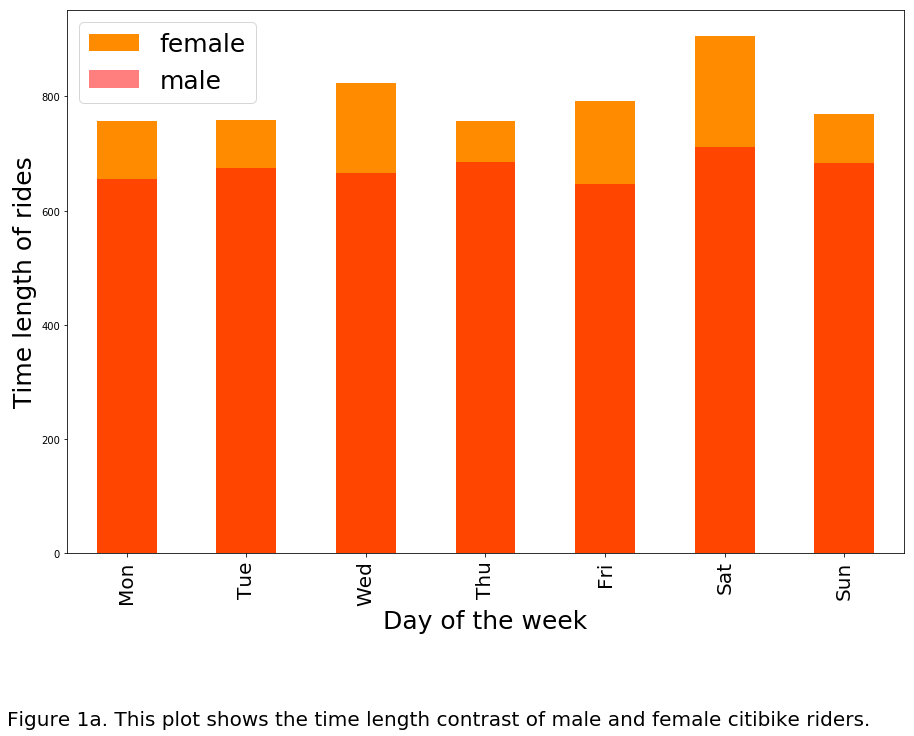

In [11]:
#Distribution of citibike users by gender in March 2015, absolute values
#gender == 1 is male, gender ==2 is female
#separate males with females
fig = pl.figure(figsize(15,10))


norm_w = 1
((ctb['tripduration'][ctb['gender'] == 2].groupby([ctb['date'].dt.weekday]).mean()) / norm_w).plot(kind="bar",color='DarkOrange', label='female')

norm_m = 1
axis = ((ctb['tripduration'][ctb['gender'] == 1].groupby([ctb['date'].dt.weekday]).mean()) / norm_m).plot(kind="bar",color='Red', alpha=0.5,label='male')


tmp = axis.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)



pl.legend(fontsize = 25)
text1 = 'Figure 1a. This plot shows the time length contrast of male and female citibike riders. '
pl.text(-1,-300,text1,fontsize = 20)
pl.xlabel('Day of the week',fontsize = 25)
pl.ylabel('Time length of rides', fontsize = 25)

## Here we add two bar charts for male and female riders separately. Incorporate with Haoming's advise.

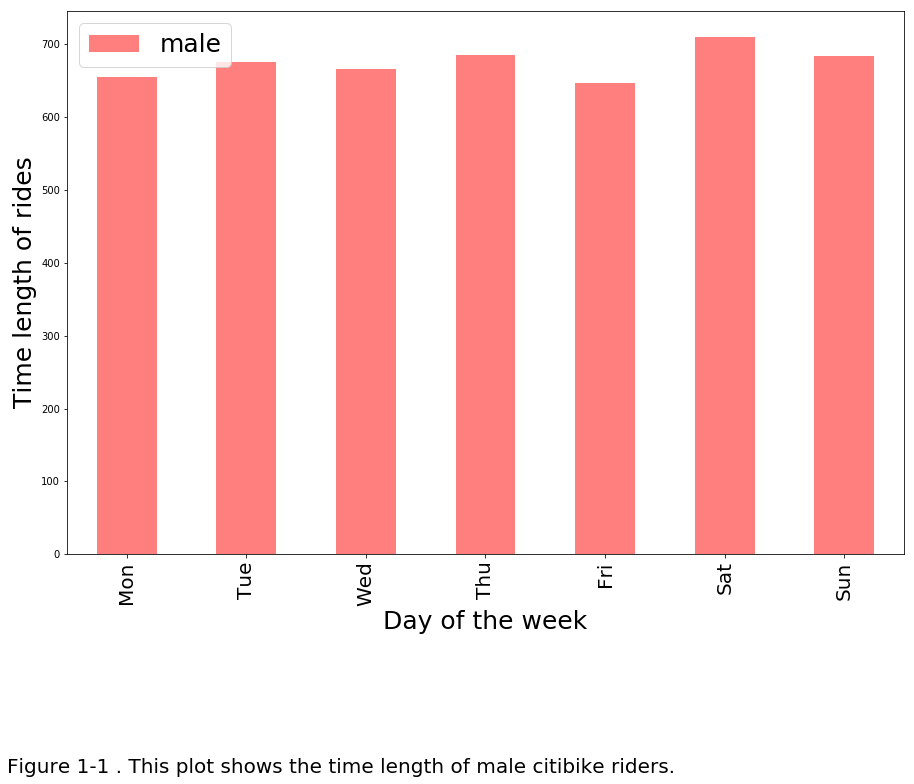

In [12]:
#Distribution of citibike users by gender in March 2015, absolute values
#gender == 1 is male, gender ==2 is female
#separate males with females
fig = pl.figure(figsize(15,10))


norm_m = 1
axis = ((ctb['tripduration'][ctb['gender'] == 1].groupby([ctb['date'].dt.weekday]).mean()) / norm_m).plot(kind="bar",color='Red', alpha=0.5,label='male')


tmp = axis.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)



pl.legend(fontsize = 25)
text1 = 'Figure 1-1 . This plot shows the time length of male citibike riders. '
pl.text(-1,-300,text1,fontsize = 20)
pl.xlabel('Day of the week',fontsize = 25)
pl.ylabel('Time length of rides', fontsize = 25)

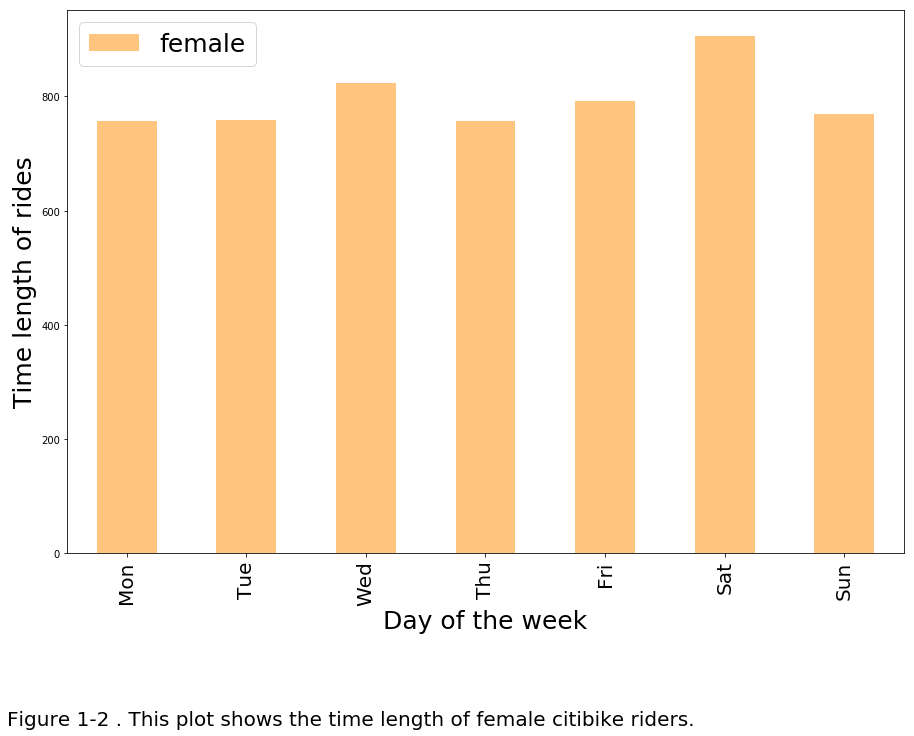

In [13]:
#Distribution of citibike users by gender in March 2015, absolute values
#gender == 1 is male, gender ==2 is female
#separate males with females
fig = pl.figure(figsize(15,10))


norm_w = 1
axis = ((ctb['tripduration'][ctb['gender'] == 2].groupby([ctb['date'].dt.weekday]).mean()) / norm_w).plot(kind="bar",color='DarkOrange', alpha=0.5,label='female')


tmp = axis.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)



pl.legend(fontsize = 25)
text1 = 'Figure 1-2 . This plot shows the time length of female citibike riders. '
pl.text(-1,-300,text1,fontsize = 20)
pl.xlabel('Day of the week',fontsize = 25)
pl.ylabel('Time length of rides', fontsize = 25)

### Figure 1b. Distribution of single ride time length by gender in March 2015, absolute values, WITH stat errors
#### the distribution in this situation follows a Poisson distribution

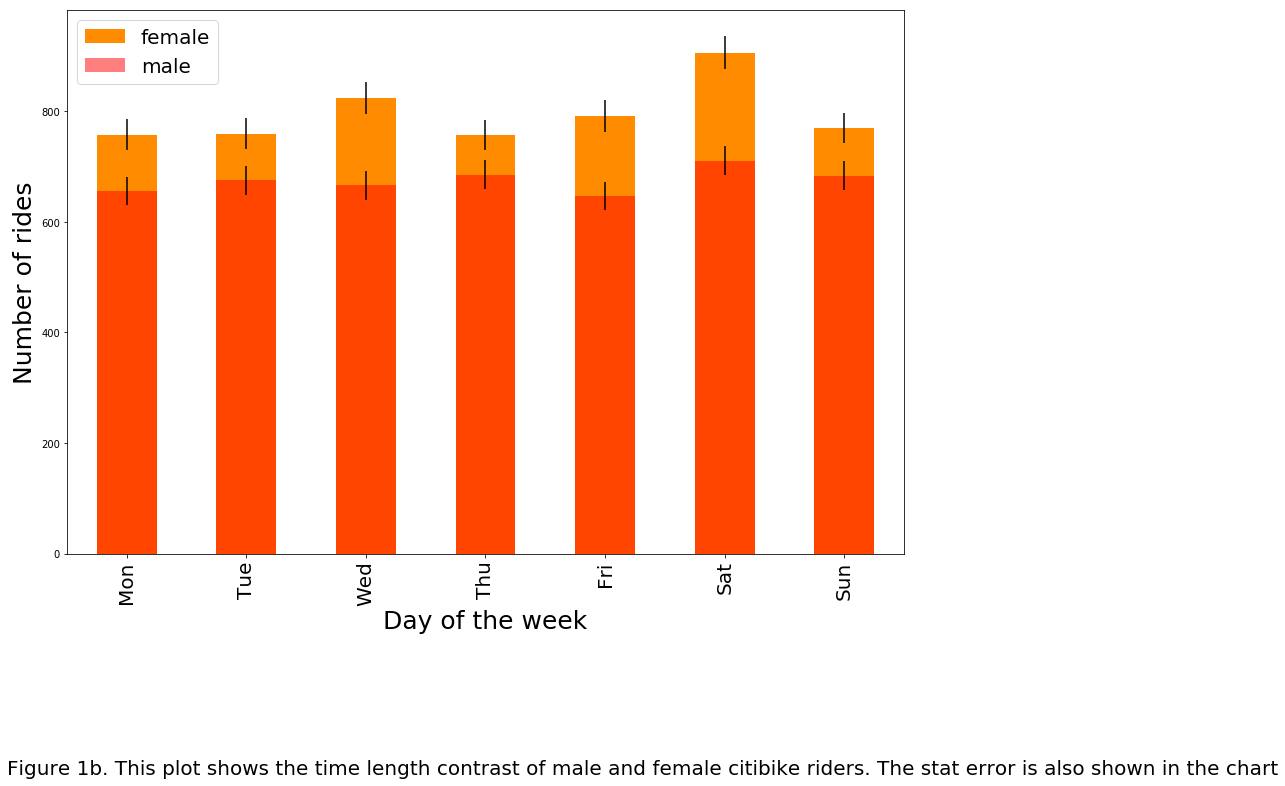

In [14]:
fig=pl.figure(figsize(15,10))


mean_w = ctb['tripduration'][ctb['gender'] == 2].groupby([ctb['date'].dt.weekday]).mean()
norm_w = 1
error_w = np.sqrt(mean_w)
axis=((mean_w) / norm_w).plot(kind="bar",color='DarkOrange',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


mean_m = ctb['tripduration'][ctb['gender'] == 1].groupby([ctb['date'].dt.weekday]).mean()
norm_m = 1
error_m=np.sqrt(mean_m)
((mean_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='Red', label='men bikers')


axis.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
axis.set_ylabel ("Number of rides")
axis.set_xlabel ("Day of the week")
pl.legend(['female','male'],fontsize=20)
text2 = 'Figure 1b. This plot shows the time length contrast of male and female citibike riders. The stat error is also shown in the chart'
pl.text(-1,-400,text2,fontsize = 20)
pl.xlabel('Day of the week',fontsize = 25)
pl.ylabel('Number of rides', fontsize = 25)

## This is the end of first part

## This the the start of the second part
## This part follows the instruction given by Dr. Bianco in github
  
## Here I will conduct z-test for this question.  The reason is that since there are two samples and we do not know the population variance. Therefore, we could choose from t or z. However, the sample size is larger than 30 which indicate t-test might not be appropriate for this question. 

In [15]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s


In [17]:
counts_w = ctb.date[ctb.gender == 2].count()
counts_m = ctb.date[ctb.gender == 1].count()
pw = counts_w / len(ctb)
pm = counts_m / len(ctb)


In [18]:
sp_stdev_mw = se(p(pw, pm, counts_w, counts_m), counts_w, counts_m)
print (sp_stdev_mw)
z_fm = zscore(pw, pm, sp_stdev_mw)
print ("The z statistics is %.2f"%z_fm)

0.00209240110216
The z statistics is -283.55


**Since the abosolute value of z test is 283.55 which is larger than 1.64 (z value for p = 0.05), we could reject null hypothesis which is the average time of women biking during the week is the same or less than man biking **  


### Final conclusion: from the hypothesis testing presented above, we could say that generally, women are more likely to riding longer than man in a single trip during the week 

### Further discussions: In further researches, we could take season/year variation into consideration to remove some systematic errors. 